# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
# One-hot encode labels
y_train_one_hot_encoded = to_categorical(y_train, num_classes=10)
y_test_one_hot_encoded = to_categorical(y_test, num_classes=10)

In [3]:
# Normalize images
x_train_normalized = x_train.astype("float32") / 255.0
x_test_normalized = x_test.astype("float32") / 255.0

In [4]:
# Define Class names based on the info in the CIFAR-10 webpage:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

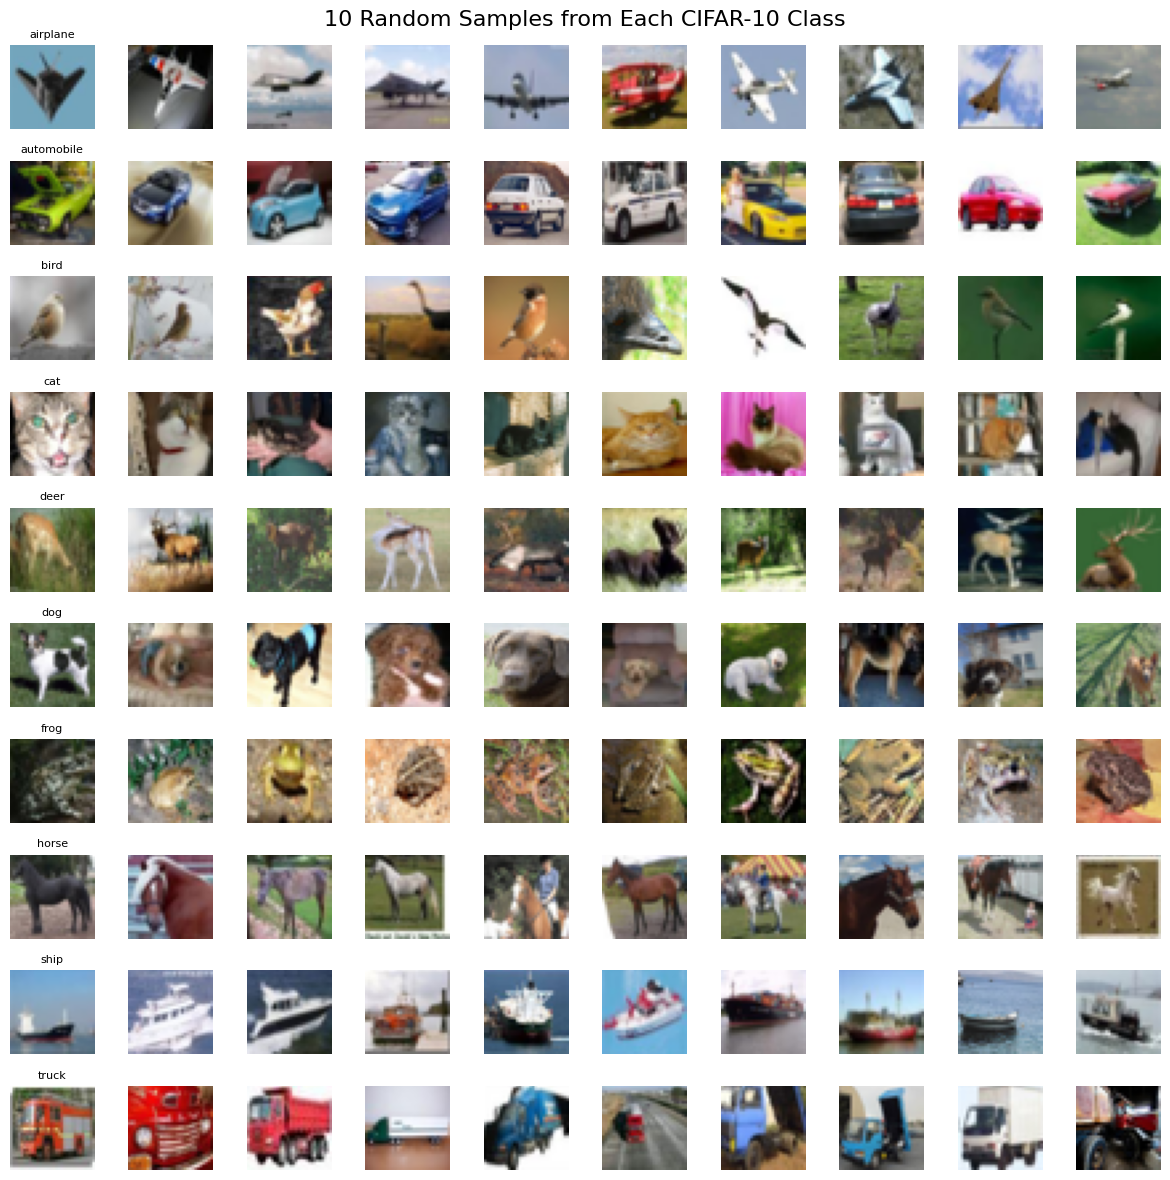

In [5]:
# Plot 10x10 images (10 per class)
samples_per_class = 10
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("10 Random Samples from Each CIFAR-10 Class", fontsize=16)

for class_id in range(10):
    idxs = np.flatnonzero(y_train == class_id)
    selected = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(selected):
        ax = axes[class_id, i]
        ax.imshow(x_train[idx])
        ax.axis('off')
        if i == 0:
            ax.set_title(class_names[class_id], fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [6]:
from keras.backend import clear_session
clear_session()

In [7]:
# Your code here :
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
     ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
# Defining batch size and nº of epochs and compiling the model using the required parameters:

batch_size = 512
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])



In [9]:
# Fitting the model:
history = model.fit(x_train_normalized, y_train_one_hot_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluating the model:
score = model.evaluate(x_test_normalized, y_test_one_hot_encoded, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.1600 - loss: 2.2656 - val_accuracy: 0.2632 - val_loss: 2.1615
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2656 - loss: 2.1280 - val_accuracy: 0.2926 - val_loss: 2.0496
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3055 - loss: 2.0210 - val_accuracy: 0.3144 - val_loss: 1.9764
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3220 - loss: 1.9547 - val_accuracy: 0.3060 - val_loss: 1.9400
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3354 - loss: 1.9186 - val_accuracy: 0.3354 - val_loss: 1.8968
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3447 - loss: 1.8804 - val_accuracy: 0.3470 - val_loss: 1.8789
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3563 - loss: 1.8585 - val_accuracy: 0.3478 - val_loss: 1.8615
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3589 - loss: 1.8393 - val_accuracy: 0.3392 - v

*   Plot the cross entropy loss curve and the accuracy curve

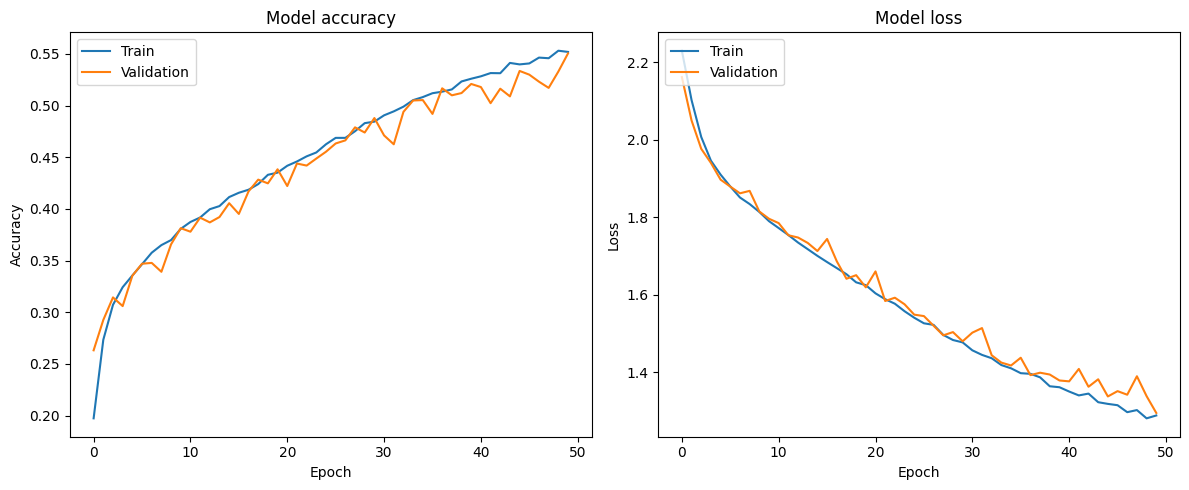

In [10]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [11]:
from keras.backend import clear_session
clear_session()

In [12]:
# Your code here :

model_2 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
     ]
)

model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
# Your code here :

#Compiling the model:
model_2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

#Training the model:
history_2 = model_2.fit(x_train_normalized, y_train_one_hot_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.1397 - loss: 2.2750 - val_accuracy: 0.2234 - val_loss: 2.1678
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2432 - loss: 2.1297 - val_accuracy: 0.2848 - val_loss: 2.0470
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2843 - loss: 2.0255 - val_accuracy: 0.3068 - val_loss: 1.9464
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3165 - loss: 1.9466 - val_accuracy: 0.3390 - val_loss: 1.8953
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3427 - loss: 1.8812 - val_accuracy: 0.3380 - val_loss: 1.8670
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3625 - loss: 1.8311 - val_accuracy: 0.3796 - val_loss: 1.8002
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3737 - loss: 1.7912 - val_accuracy: 0.3562 - val_loss: 1.8121
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3879 - loss: 1.7617 - val_accuracy: 0.3852 - 

In [14]:
#Evaluating the model:

score_2 = model_2.evaluate(x_test_normalized, y_test_one_hot_encoded, verbose=0)

print("Test loss:", score_2[0])
print("Test accuracy:", score_2[1])

Test loss: 1.2178865671157837
Test accuracy: 0.5694000124931335


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


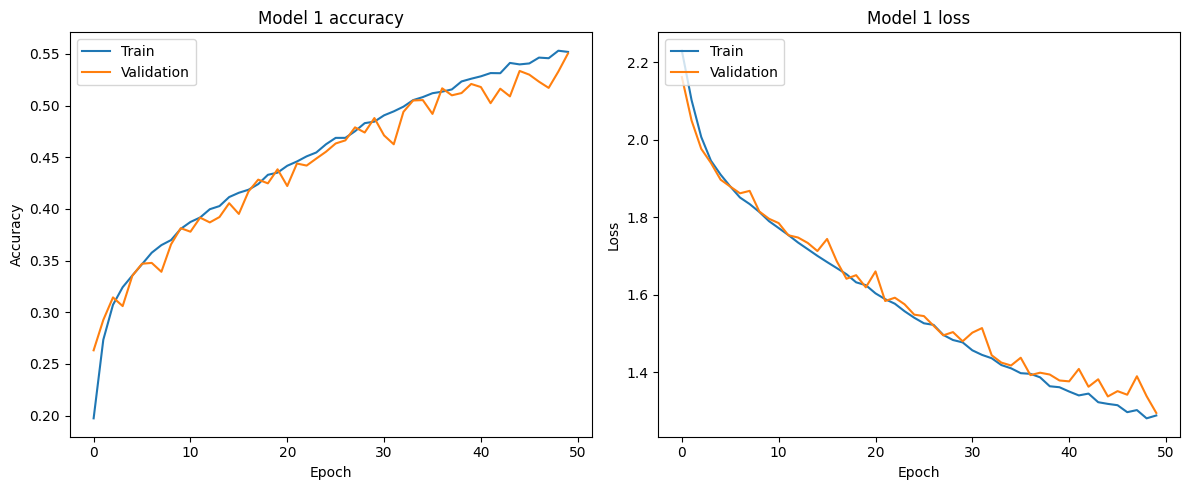

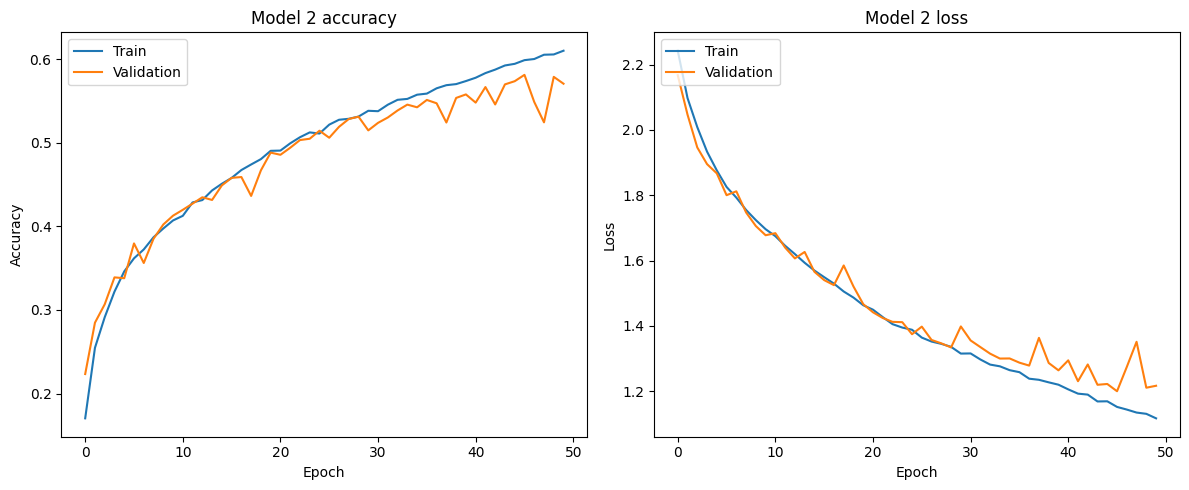

In [15]:
# Your code here :

# Loss and accuracy curves of first model:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

#Loss and accuracy curves of second model (deeper):

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Comment on the observation**

After analyzing the graphs for both models, we can see that the deeper model is performing slightly better, but not significantly. If we focus on the validation line in each graph, we can see that the validation accuracy for the model 2 ends-up being around 0.59 for model 2 after 50 epochs and for model 1, experiences a significant decrease in the last epoch, leasing to an accuracy value of 0.51.

When it comes to the loss value, we observe a very similar behaviour, but inversed, as the lower the loss, the better.
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


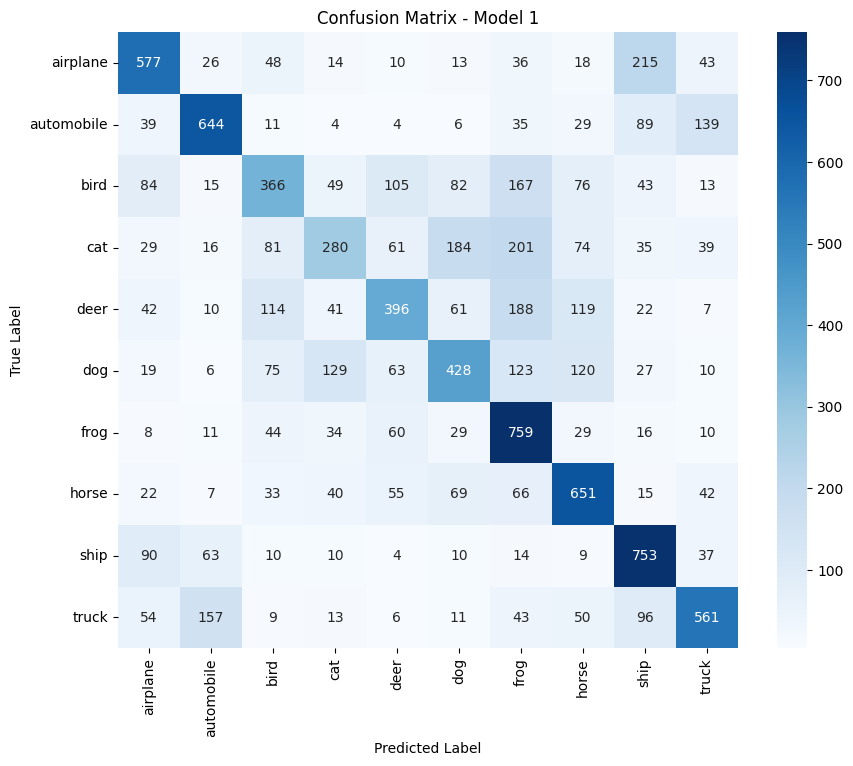

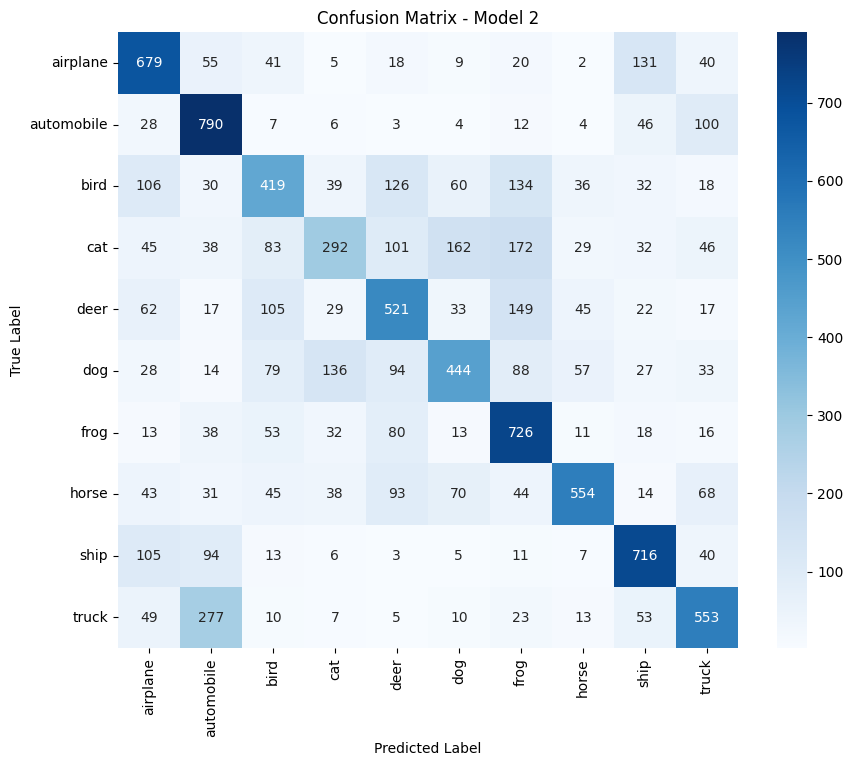

In [16]:
# Your code here :

# Model 1 predictions:

y_pred_model_1 = model.predict(x_test_normalized)

# Convert predictions from probabilities to class labels
y_pred_class_model_1 = np.argmax(y_pred_model_1, axis=1)

# Model 2 predictions:

y_pred_model_2 = model_2.predict(x_test_normalized)

# Convert predictions from probabilities to class labels
y_pred_class_model_2 = np.argmax(y_pred_model_2, axis=1)

#Plotting confusion matrices:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Model 1
cm_model_1 = confusion_matrix(y_test, y_pred_class_model_1)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_model_1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Model 1')
plt.show()

# Confusion Matrix for Model 2
cm_model_2 = confusion_matrix(y_test, y_pred_class_model_2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_model_2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Model 2')
plt.show()



**Comment here :**

After analyzing both confusion matrices (for both models), we can observe that the most common confusion is between the classes 'automobile' and 'truck'. This is something I would expect, as they are very similar and share most features between them. On the other hand, we can observe some level of confussion between the different animal classes. Especially with 'frog' and 'bird' classes.

...

*    Print the test accuracy for the trained model.

In [17]:
# Your code here :

# Print the test accuracy for Model 1
print("Test accuracy for Model 1:", score[1])

# Print the test accuracy for Model 2
print("Test accuracy for Model 2:", score_2[1])

Test accuracy for Model 1: 0.5414999723434448
Test accuracy for Model 2: 0.5694000124931335


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [18]:
from keras.backend import clear_session
clear_session()

In [20]:
# Your code here :

import tensorflow as tf
# Resizing input input data, so that it can be 64x64
x_train_resized = tf.image.resize(x_train_normalized, (64, 64)).numpy()
x_test_resized = tf.image.resize(x_test_normalized, (64, 64)).numpy()

model_3 = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
     ]
)

model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,535,434 (36.37 MB)

 Trainable params: 9,535,434 (36.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [21]:
# Your code here :


# Compiling the model:

model_3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

# Training the model:

batch_size = 512
epochs = 10

history_3 = model_3.fit(x_train_resized, y_train_one_hot_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 112s 919ms/step - accuracy: 0.1084 - loss: 2.3012 - val_accuracy: 0.1054 - val_loss: 2.2960
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 63s 364ms/step - accuracy: 0.1099 - loss: 2.2923 - val_accuracy: 0.1426 - val_loss: 2.2700
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 360ms/step - accuracy: 0.1691 - loss: 2.2396 - val_accuracy: 0.1990 - val_loss: 2.1663
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 363ms/step - accuracy: 0.2425 - loss: 2.1041 - val_accuracy: 0.3122 - val_loss: 1.9744
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 32s 361ms/step - accuracy: 0.2968 - loss: 1.9954 - val_accuracy: 0.3298 - val_loss: 1.8979
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - accuracy: 0.3219 - loss: 1.9234 - val_accuracy: 0.3180 - val_loss: 1.9780
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.3462 - loss: 1.8633 - val_accuracy: 0.3434 - val_loss: 1.8533
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - accuracy: 0.3633 - loss: 1.7946 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


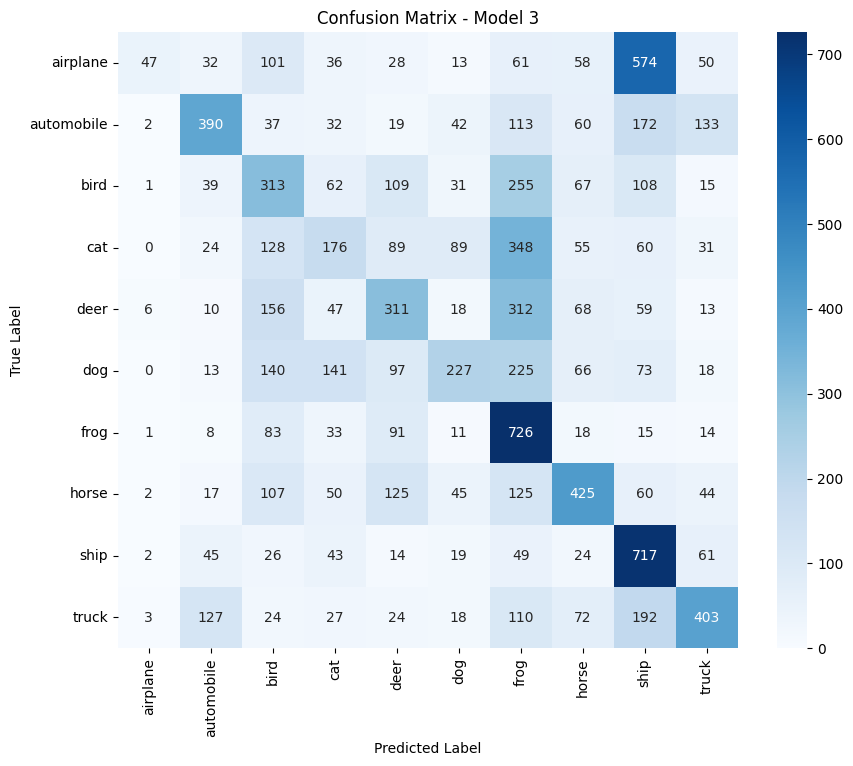

In [22]:
# Model 3 predictions:

y_pred_model_3 = model_3.predict(x_test_resized)

# Convert predictions from probabilities to class labels
y_pred_class_model_3 = np.argmax(y_pred_model_3, axis=1)

#Plotting confusion matrices:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Model 1
cm_model_3 = confusion_matrix(y_test, y_pred_class_model_3)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_model_3, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Model 3')
plt.show()

In this 3rd model, the results are much worse. When observing the confusion matrix, we can identify much higher relative confusions between classes. Especially between 'ship' and 'airplane' classes, as well as animal ones, being 'frog' the most affected. The reason behind this lower accuracy in comparison with the 2 previous models is probably due to the lower number of epochs (10 vs 50), as well as the increased complexity of the model (many more layers and filters), without adapting the hyperparametrs to account for this additional complexity.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
- Activation functions are non-linear functions applied to the output of each neuron (or layer) in a neural network. They are crucial because they introduce non-linearity into the model. Without activation functions, a neural network would essentially be just a series of linear transformations (matrix multiplications and additions). A composition of linear transformations is still a linear transformation. This means that a network without activation functions, no matter how many layers it has, could only learn linear relationships between inputs and outputs.

- Many real-world problems are inherently non-linear (e.g., image recognition, natural language processing). Activation functions allow the network to learn complex, non-linear patterns and map them to the output. They enable the network to approximate any non-linear function, making them universal function approximators (given enough neurons and layers).

2 - Key Differences between sigmoid and softmax:
Both sigmoid and softmax are activation functions often used in the output layer of a neural network, but they are used for different types of classification problems:

- Sigmoid: The sigmoid function outputs a value between 0 and 1. It is typically used for binary classification problems, where the output is a single value representing the probability of the input belonging to one of the two classes (e.g., spam or not spam). If you have a multi-label classification problem (where an input can belong to multiple classes simultaneously), you might use a sigmoid activation function for each output neuron, with each neuron representing the probability of belonging to a specific class independently.

- Softmax: The softmax function is used for multi-class classification problems, where the input belongs to exactly one of several classes (e.g., classifying an image as a cat, dog, or bird). Softmax takes a vector of arbitrary real values as input and converts them into a probability distribution. The output is a vector where each element is between 0 and 1, and all elements sum up to 1. Each element in the output vector represents the probability that the input belongs to the corresponding class. This makes it ideal for exclusive multi-class classification.

In summary:

- Sigmoid for binary or multi-label classification (independent probabilities).
- Softmax for multi-class classification (probabilities that sum to 1).

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
These are loss functions used to measure the difference between the predicted probabilities and the actual ground truth labels in classification problems. The choice of loss function depends on the type of classification and the output activation function.

- Binary Crossentropy: This loss function is used for binary classification problems. It is typically used with a sigmoid activation function in the output layer. It measures the difference between the predicted probability for the positive class and the actual binary label (0 or 1).

- Categorical Crossentropy: This loss function is used for multi-class classification problems where the true labels are in a one-hot encoded format (like the y_train_one_hot_encoded you created). It is typically used with a softmax activation function in the output layer. It measures the difference between the predicted probability distribution (output by softmax) and the true one-hot encoded probability distribution.

In summary:

- Binary Crossentropy for binary classification (with sigmoid output).
- Categorical Crossentropy for multi-class classification with one-hot encoded labels (with softmax output).

